<a href="https://colab.research.google.com/github/mnaithan/UTAustinPGP/blob/master/Unsupervised_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

Reading Datafram

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/mnaithan/UTAustinPGP/master/Data/Credit%20Card%20Customer%20Data.csv')

In [34]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [35]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


Inspecting Shape of DataFrame it has 660 rows and 7 colums

In [36]:
df.shape

(660, 7)

All the datatypes are of type 'int64'

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


Inspecting nulls, there is no null value

In [38]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

Dropping Sl_No and Customer key Columns

In [0]:

df.drop(columns = ['Sl_No','Customer Key'],inplace=True)


In [40]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

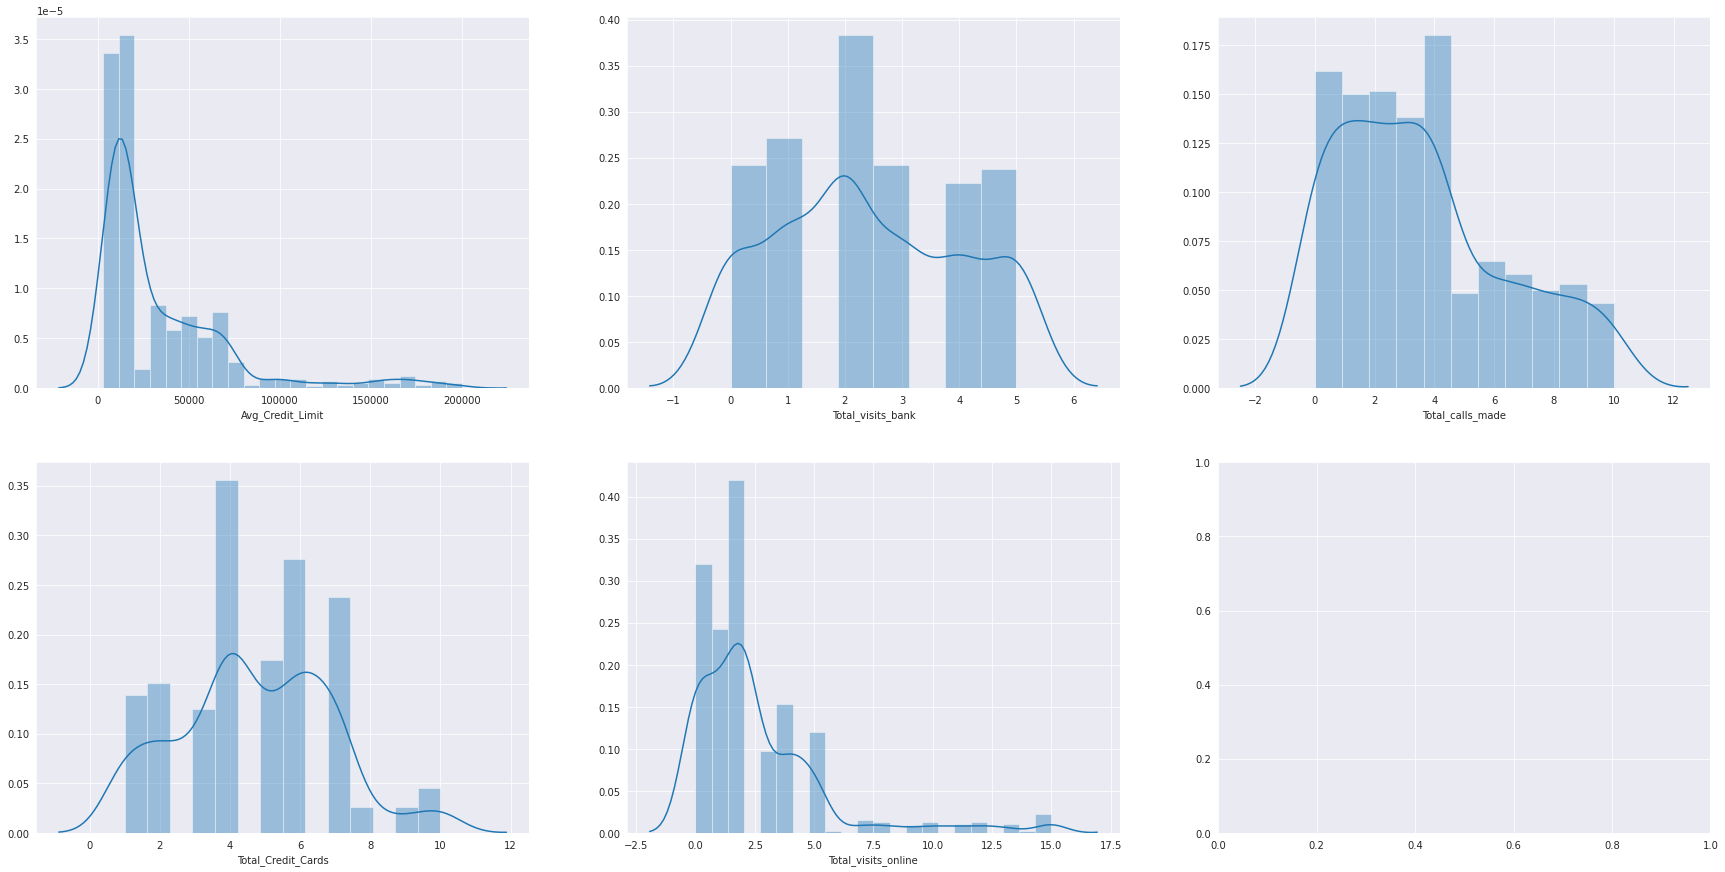

In [41]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2,3,figsize=(30,15))
for i,feature in enumerate(df.columns):
  sns.distplot(df[feature] , ax=axes[i%2, i//2])


In [0]:
from scipy.stats import zscore

Scaling DataFrame with z_score 

In [0]:
dfScaled=df.apply(zscore)

In [44]:
dfScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


below histograms give us an idea of how many clusters we can make by looking at peaks of various histograms

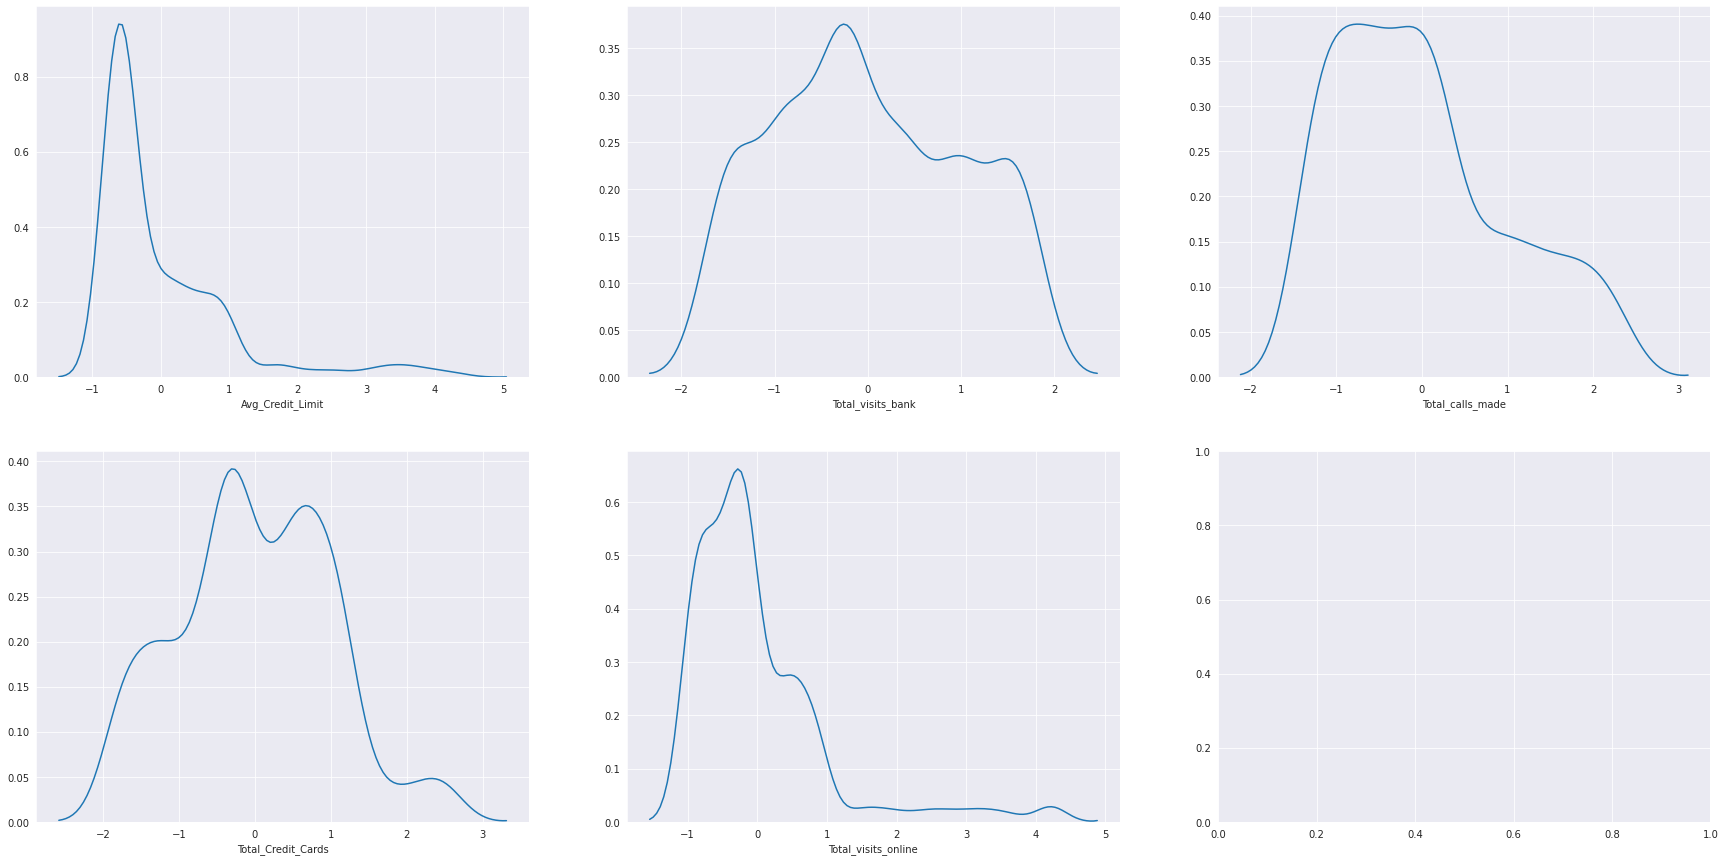

In [45]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2,3,figsize=(30,15))
for i,feature in enumerate(df.columns):
  sns.distplot(dfScaled[feature] , ax=axes[i%2, i//2],hist=False)

In [0]:
from sklearn.cluster import KMeans

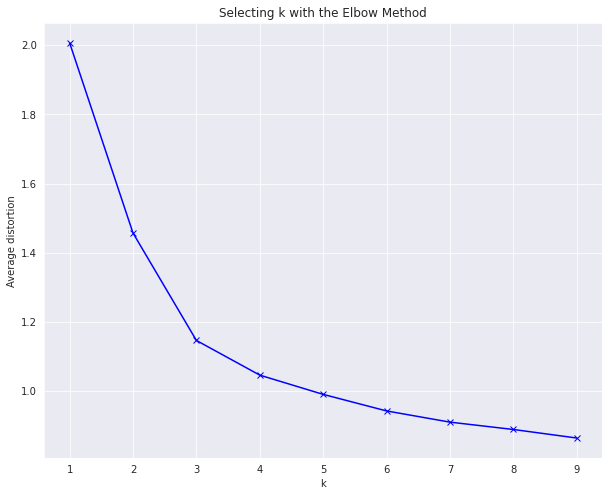

In [47]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfScaled)
    prediction=model.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfScaled.shape[0])

plt.figure(figsize = (10,8))
plt.plot(clusters, meanDistortions, 'bx-');
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

There seeem to be 2 clusters ( 3 and 5 ), lets build model and analyze 

In [48]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

#Append the prediction 
df["GROUP"] = prediction
dfScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


In [49]:
dfClust = df.groupby(['GROUP'])
dfClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


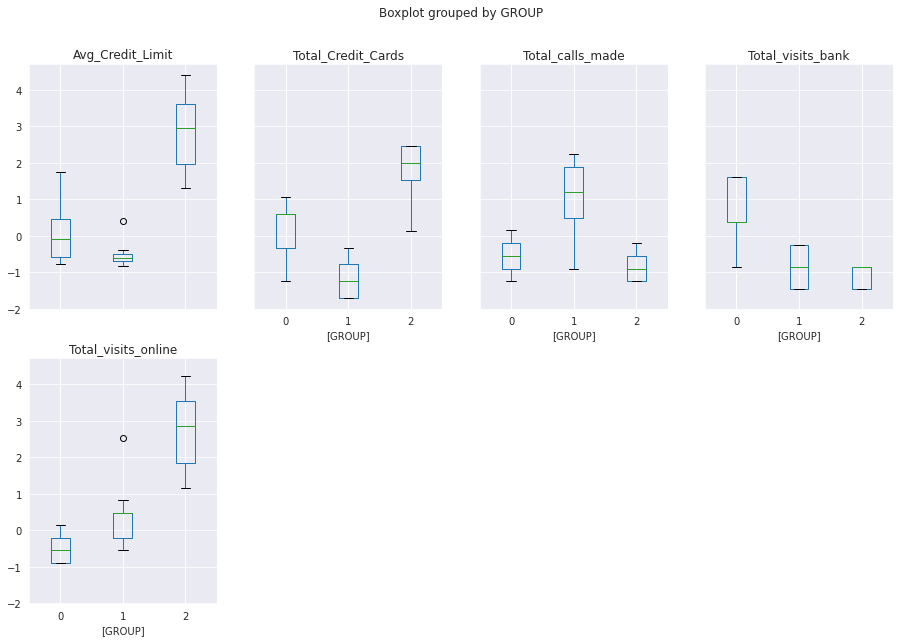

In [50]:
dfScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));

As we can see with 3 grouops (0,1,2):

*   Group 0 has higher Total Number of Bank Visits
*   Group 1 has low Avg_Credit_Limit, Total Credit Cards
*    Group 2 has high Avg_Credit_Limit, Total Credit Cards and Online Visits





Now lets try with 5 groups

In [51]:
final_model=KMeans(5)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

#Append the prediction 
df["GROUP"] = prediction
dfScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


In [52]:
dfClust = df.groupby(['GROUP'])
dfClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,36260.204082,5.551020,2.494898,0.954082,2.061224
1,12300.813008,2.357724,0.878049,3.626016,8.398374
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,12019.801980,2.475248,1.000000,3.465347,5.009901
4,31226.315789,5.478947,4.515789,1.010526,1.936842


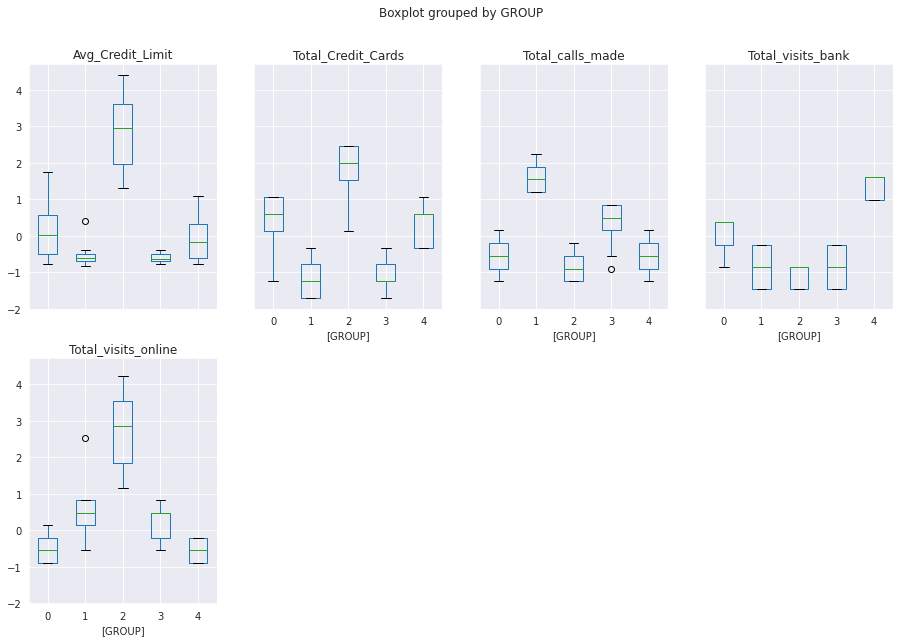

In [53]:
dfScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));

As we can see with 5 grouops (0,1,2,3,4):

*  Group 0 has lower number of Total Credit Cards
*  Group 2 has high Avg_Credit_Limit, Total Credit Cards and Online Visits
*  Group 3 has lower number of Online visits and Bank Visits are higher
*  Group 4 has lower number of Bank Visits

### Using Hierarchical Clustering

In [0]:
from sklearn.cluster import AgglomerativeClustering 

In [55]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


### Removing 'GROUP' column from df and dfScaled

In [0]:
df.drop(columns=['GROUP'],inplace=True)
dfScaled.drop(columns=['GROUP'],inplace=True)

In [57]:
dfScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [0]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [60]:
model.fit(dfScaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [61]:
df['labels'] = model.labels_
df.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,2
6,100000,5,0,11,2,1
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
9,3000,4,0,1,7,2


In [0]:
df = df.groupby('labels')

In [65]:
df.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


In [0]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [0]:
from scipy.spatial.distance import pdist

In [68]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(dfScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(dfScaled))

c

0.8977080867389372

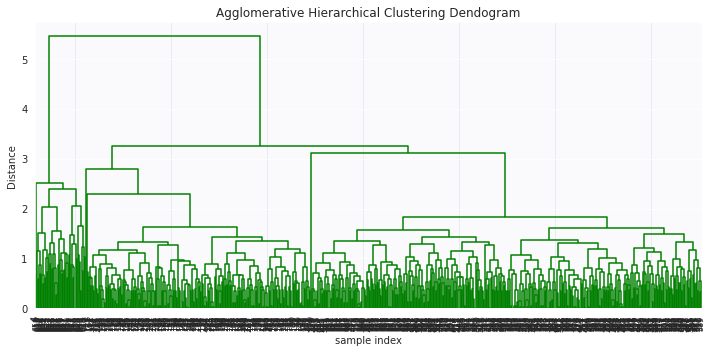

In [69]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [72]:
# Using 'complete' method

Z = linkage(dfScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(dfScaled))

c

0.8599730607972423

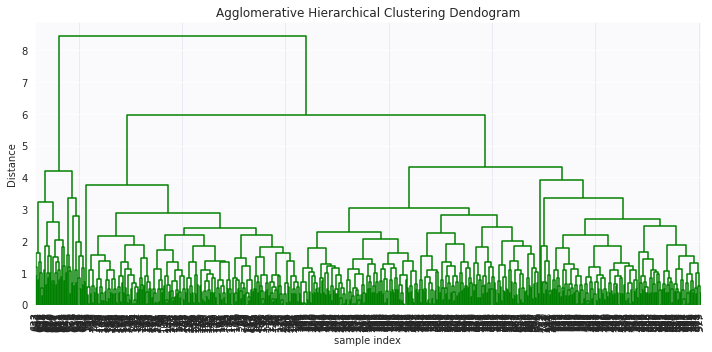

In [73]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [74]:
# Using 'complete' method

Z = linkage(dfScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(dfScaled))

c

0.7415156284827492

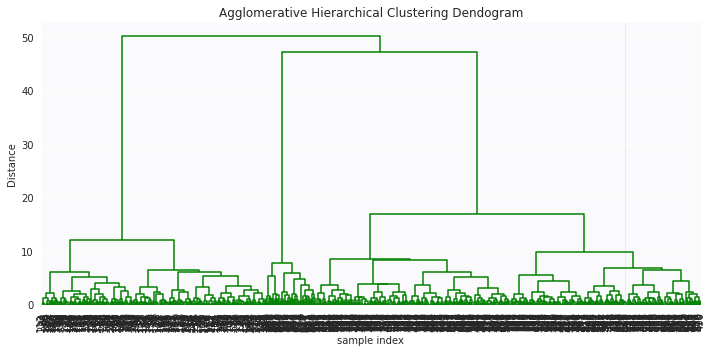

In [75]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

As we can see above 'Average' method gives highest 'cophenet index'